# **Task 3: Feature Engineering**

Here we are going to generate some new efatures and drop unnecessary information. 

In [1]:
# Data processing
import pandas as pd
import numpy as np

In [2]:
# Stat tools 
from scipy import stats

In [3]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None

In [5]:
# Increase default figure and font sizes for easier viewing.
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## **Data importing and cleaning**

In [6]:
# This time we are going to import dataframe in an appropriate data types format
data_all_agg = pd.read_csv('data_raw/data_all_agg.csv', 
                           index_col=0,
                           dtype = {'order_id': str, 
                                    'seller_id': str, 
                                    'order_item_id': int, 
                                    'price': float, 
                                    'freight_value': float, 
                                    'product_weight_g':float, 
                                    'product_volume': float,
                                    'customer_city':str,
                                    'customer_state':str,
                                    'customer_lat': float,
                                    'customer_lng':float,
                                    'seller_city':str,
                                    'seller_state':str,
                                    'seller_lat': float,
                                    'seller_lng':float,
                                    'distance_km':float,
                                    'delivery_time_hours':float,
                                    'delivery_speed':float,
                                    'delivery_time_days':int},
                           parse_dates=['order_purchase_timestamp',
                                         'order_approved_at',
                                         'shipping_limit_date',
                                         'order_delivered_carrier_date',
                                         'order_delivered_customer_date',
                                         'order_estimated_delivery_date'])

In [7]:
# Check dtypes
data_all_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94653 entries, 0 to 94652
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94653 non-null  object        
 1   seller_id                      94653 non-null  object        
 2   order_item_id                  94653 non-null  int64         
 3   price                          94653 non-null  float64       
 4   freight_value                  94653 non-null  float64       
 5   product_weight_g               94653 non-null  float64       
 6   product_volume                 94653 non-null  float64       
 7   customer_city                  94653 non-null  object        
 8   customer_state                 94653 non-null  object        
 9   customer_lat                   94653 non-null  float64       
 10  customer_lng                   94653 non-null  float64       
 11  seller_city    

In [8]:
data_all_agg.head()

,order_id,seller_id,order_item_id,price,freight_value,product_weight_g,product_volume,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_km,delivery_time,delivery_speed,delivery_time_hours,delivery_time_days
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1,58.90,13.29,650.0,3528.0,campos dos goytacazes,RJ,-21.762775,-41.309633,volta redonda,SP,-22.496953,-44.127492,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,301.50,182.0,1.656593,182.0,7
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,1,239.90,19.93,30000.0,60000.0,santa fe do sul,SP,-20.220527,-50.903424,sao paulo,SP,-23.565096,-46.518565,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-03 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,585.56,389.0,1.505296,389.0,16
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,1,199.00,17.87,3050.0,14157.0,para de minas,MG,-19.870305,-44.593326,borda da mata,MG,-22.262584,-46.171124,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-18 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,312.34,190.0,1.643895,190.0,7
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,1,12.99,12.79,200.0,2400.0,atibaia,SP,-23.089925,-46.611654,franca,SP,-20.553624,-47.387359,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-15 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,293.17,147.0,1.994354,147.0,6
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,1,199.90,18.14,3750.0,42000.0,varzea paulista,SP,-23.243402,-46.827614,loanda,PR,-22.929384,-53.135873,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-13 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,646.16,602.0,1.073355,602.0,25


### **Metrics**

In [9]:
import math

#### **Mean Absolute Error of base client model in days**

In [10]:
MAE = np.abs((data_all_agg.order_delivered_customer_date - data_all_agg.order_estimated_delivery_date).dt.days).mean()
print(f'Mean Absolute Error for baseline model is: {MAE: .2f}')

Mean Absolute Error for baseline model is:  13.32


#### **Mean Squared Error of base client model in days**

In [11]:
MSE = np.square((data_all_agg.order_delivered_customer_date - data_all_agg.order_estimated_delivery_date).dt.days).mean() 
RMSE = math.sqrt(MSE)

In [12]:
print(f'Root Mean Squared Error for baseline model is: {RMSE: .2f}')

Root Mean Squared Error for baseline model is:  15.65


#### **Mean Forecasting Error of base client model in days**

In [13]:
MFE = ((data_all_agg.order_estimated_delivery_date - data_all_agg.order_delivered_customer_date).dt.days).mean()
print(f'Mean Absolute Error for baseline model is: {MFE: .2f}')

Mean Absolute Error for baseline model is:  10.89


In average the delivivery date forecasting model give almost 11 days more for each order. So, in result, the order will be delivered much faster then estimated days.

#### **Percent of right forecast**

In [14]:
(data_all_agg.order_estimated_delivery_date.dt.floor('d') == data_all_agg.order_delivered_customer_date.dt.floor('d')).value_counts()

False    93391
True      1262
dtype: int64

In [15]:
PRF = round(1262 / (93391+1262) * 100, 2)
print(f'Percent of right delivery day forecast for client model is: {PRF: .2f}%')

Percent of right delivery day forecast for client model is:  1.35%


The existing model accuratly predict only 1.35% of all orders.

In [21]:
(np.abs(data_all_agg.order_estimated_delivery_date - data_all_agg.order_delivered_customer_date).dt.days < 2).value_counts()

False    89623
True      5030
dtype: int64

In [24]:
PRF_2_day = round( 5030 / (93391+1262) * 100, 2)
print(f'Percent of right delivery day forecast for client model within 2 day is: {PRF_2_day: .2f}%')

Percent of right delivery day forecast for client model within 2 day is:  5.31%


#### Short summary

Ми вирахували, що Ваша модель має середню абсолютну похибку 13 днів. Проте дана метрика просто відображає наскільки модель відхиляється від фактичної дати доставки, але не показує в яку сторону. Тому ми також вирахували, що здебільшого Ваша модель робить перепрогноз на  майже 11 днів. В той же час точний прогноз, прогнозована дата доставки дорівнює фактичній, на наданих Вами даних становить 1.35%. Якщо розширити межі до похибки в недоброгноз/перепрогноз до 1 дня, то на даний момент Ваша модель показує 5.31% від даних. На даний момент нами побудуване базове рішення, яке дає середню похибку прогнозу 4 дні і ми працюємо над її вдосконаленням. Яка межа прогнозу у днях (перепрогноз/недопрогноз) Вас задовільнить?.

### **Generate new features**

In [25]:
# Make a copy of the working dataset
data_all_agg_prep = data_all_agg.copy(deep=True)

In [26]:
data_all_agg_prep.head(2)

,order_id,seller_id,order_item_id,price,freight_value,product_weight_g,product_volume,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_km,delivery_time,delivery_speed,delivery_time_hours,delivery_time_days
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1,58.9,13.29,650.0,3528.0,campos dos goytacazes,RJ,-21.762775,-41.309633,volta redonda,SP,-22.496953,-44.127492,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,301.50,182.0,1.656593,182.0,7
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,1,239.9,19.93,30000.0,60000.0,santa fe do sul,SP,-20.220527,-50.903424,sao paulo,SP,-23.565096,-46.518565,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-03 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,585.56,389.0,1.505296,389.0,16


In [27]:
# Seller and cutomer are in the same state
data_all_agg_prep['same_state'] = (data_all_agg_prep.customer_state == data_all_agg_prep.seller_state).replace({True:1, False:0})

In [28]:
#Seller and customer are in the same city
data_all_agg_prep['same_city'] = (data_all_agg_prep.customer_city == data_all_agg_prep.seller_city).replace({True:1, False:0})

In [29]:
data_all_agg_prep['shipping_limit_date_overdue'] = (data_all_agg_prep.shipping_limit_date > data_all_agg_prep.order_delivered_carrier_date).replace({True:1, False:0})

In [30]:
# Time in hours from purchase to order approving in hours
# We could lose som info if it wil be in days
data_all_agg_prep['time_purchase_approved'] = (data_all_agg_prep.order_approved_at - data_all_agg_prep.order_purchase_timestamp).dt.days

In [31]:
# Time in hours from approving to delivering to carrier in hours
# We could lose som info if it wil be in days
data_all_agg_prep['time_approved_delivered_carrier'] = (data_all_agg_prep.order_delivered_carrier_date - data_all_agg_prep.order_approved_at).dt.days

In [32]:
# hash_space = 3000
data_all_agg_prep['hashed_customer_city'] = pd.Series(hash(place) for place in data_all_agg_prep.customer_city)
data_all_agg_prep['hashed_seller_city'] = pd.Series(hash(place) for place in data_all_agg_prep.seller_city)

data_all_agg_prep['hashed_customer_state'] = pd.Series(hash(place) for place in data_all_agg_prep.customer_state)
data_all_agg_prep['hashed_seller_state'] = pd.Series(hash(place) for place in data_all_agg_prep.seller_state)

In [33]:
data_all_agg_prep[data_all_agg_prep.time_approved_delivered_carrier == 0].head(2)

,order_id,seller_id,order_item_id,price,freight_value,product_weight_g,product_volume,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_km,delivery_time,delivery_speed,delivery_time_hours,delivery_time_days,same_state,same_city,shipping_limit_date_overdue,time_purchase_approved,time_approved_delivered_carrier,hashed_customer_city,hashed_seller_city,hashed_customer_state,hashed_seller_state
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,00048cc3ae777c65dbb7d2a0634bc1ea,6426d21aca402a131fc0a5d0960a3c90,1,21.9,12.69,450.0,2880.0,uberaba,MG,-19.740199,-47.924793,ribeirao preto,SP,-21.190128,-47.787901,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-23 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06,161.85,160.0,1.011562,160.0,6,0,0,1,1,0,-829314452290591256,-7313688245212824808,295471655616810801,-4850968688601002385
12,0006ec9db01a64e59a68b2c340bf65a7,4a3ca9315b744ce9f8e9374361493884,1,74.0,23.32,1383.0,20000.0,rio de janeiro,RJ,-22.879221,-43.459310,ibitinga,SP,-21.757321,-48.829744,2018-07-24 17:04:17,2018-07-24 17:24:20,2018-07-26 17:24:20,2018-07-25 11:02:00,2018-07-31 01:04:15,2018-08-22,566.30,151.0,3.750331,151.0,6,0,0,1,0,0,5360404565088014902,3034075958876919490,7860412576608632623,-4850968688601002385


#### Special part with avg delivery speed incorporation into the features

Тут є варіант додати ще фічу зі швидкістю доставки за попередні періоди для продавця. Є декілька варіантів. Найпростіший - це просто взяти середнє значення або медіанне. Більш складний варіант - це врахувати, що на різну відстань додавки різна швидкість. 

In [127]:
# Check the number of time from purchasing to approving to less then 1 hour
data_all_agg_prep.time_purchase_approved.isin([0]).sum()

78083

In [128]:
# Check the number of time from approving to delivering to carrier less then 1 hour
data_all_agg_prep.time_approved_delivered_carrier.isin([0]).sum()

27358

In [103]:
order_date = data_all_agg_prep[data_all_agg_prep.order_id == '00611822267e76e0055c25c18506f06e'].order_purchase_timestamp.tolist()[0]

In [108]:
seller = data_all_agg_prep[data_all_agg_prep.order_id == '00611822267e76e0055c25c18506f06e'].seller_id.tolist()[0]

In [109]:
order_date, seller

(Timestamp('2018-07-26 13:35:01'), '23d7c96d4a1160db1c726b248601b25a')

In [112]:
data_all_agg_prep[(data_all_agg_prep.order_purchase_timestamp <= order_date) & 
                  (data_all_agg_prep.seller_id == seller)].sort_values(by=['order_purchase_timestamp'], ascending=False).delivery_speed.mean()

1.6112678826997706

In [48]:
orders = data_all_agg_prep.order_id.unique().tolist()
sellers = data_all_agg_prep.seller_id.unique().tolist()

In [49]:
data_all_agg_prep['avg_seller_speed'] = 0

In [51]:
%%time
for order in orders:
    order_date = data_all_agg_prep[data_all_agg_prep.order_id == order].order_purchase_timestamp.tolist()[0]
    seller = data_all_agg_prep[data_all_agg_prep.order_id == '00611822267e76e0055c25c18506f06e'].seller_id.tolist()[0]
    
    avg_seller_sp = data_all_agg_prep[(data_all_agg_prep.order_purchase_timestamp <= order_date) & 
                  (data_all_agg_prep.seller_id == seller)].sort_values(by=['order_purchase_timestamp'], ascending=False).delivery_speed.mean()
    
    data_all_agg_prep[(data_all_agg_prep.order_purchase_timestamp == order_date) & 
                  (data_all_agg_prep.seller_id == seller)].avg_seller_speed = avg_seller_sp
    

CPU times: user 39min 38s, sys: 1.09 s, total: 39min 39s
Wall time: 39min 46s


In [43]:
df_test = data_all_agg_prep[data_all_agg_prep.seller_id == '6426d21aca402a131fc0a5d0960a3c90'][['delivery_speed','distance_km']]

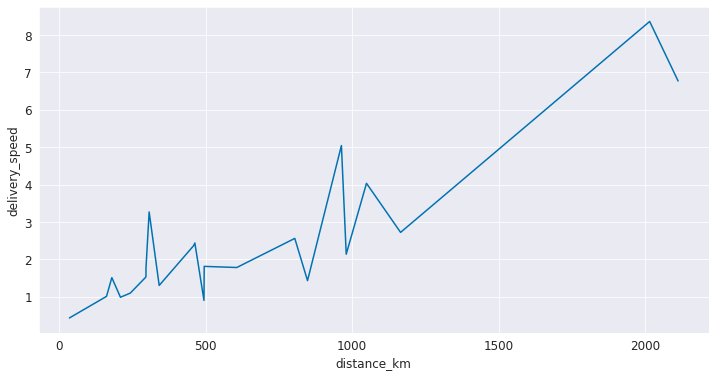

In [46]:
sns.lineplot(x=df_test.distance_km ,y=df_test.delivery_speed, estimator='mean');

In [114]:
data_all_agg_prep.head(1)

,order_id,seller_id,order_item_id,price,freight_value,product_weight_g,product_volume,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_km,delivery_time,delivery_speed,delivery_time_hours,delivery_time_days,same_state,same_city,shipping_limit_date_overdue,time_purchase_approved,time_approved_delivered_carrier,hashed_customer_city,hashed_seller_city,hashed_customer_state,hashed_seller_state
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1,58.9,13.29,650.0,3528.0,campos dos goytacazes,RJ,-21.762775,-41.309633,volta redonda,SP,-22.496953,-44.127492,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,301.5,182.0,1.656593,182.0,7,0,0,0,0.0,152.0,-8046876946468587586,8830193365186712737,-8452078374672731262,-2348517858702383879


In [129]:
# For beseline model we a
data_all_agg_prep.drop(['order_id',
                        'seller_id',
                        'customer_city',
                        'customer_state',
                        'seller_city',
                        'seller_state',
                        'order_purchase_timestamp',
                        'order_approved_at',
                        'shipping_limit_date',
                        'order_delivered_carrier_date',
                        'order_delivered_customer_date',
                        'order_estimated_delivery_date',
                        'delivery_time_hours',
                        'delivery_time',
                        'delivery_speed'],# This could couse a data target leakage, as  
                         axis=1, inplace=True)
data_all_agg_prep.head(2)

,order_item_id,price,freight_value,product_weight_g,product_volume,customer_lat,customer_lng,seller_lat,seller_lng,distance_km,delivery_time_days,same_state,same_city,shipping_limit_date_overdue,time_purchase_approved,time_approved_delivered_carrier,hashed_customer_city,hashed_seller_city,hashed_customer_state,hashed_seller_state
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,1,58.9,13.29,650.0,3528.0,-21.762775,-41.309633,-22.496953,-44.127492,301.50,7,0,0,0,0,6,-8046876946468587586,8830193365186712737,-8452078374672731262,-2348517858702383879
1,1,239.9,19.93,30000.0,60000.0,-20.220527,-50.903424,-23.565096,-46.518565,585.56,16,1,0,0,0,8,-4176635117835696672,-7438935248913176890,-2348517858702383879,-2348517858702383879


In [130]:
Y = data_all_agg_prep['delivery_time_days']
X = data_all_agg_prep.drop(['delivery_time_days'], axis=1)

In [131]:
X.to_csv('data_raw/data_x.csv')
Y.to_csv('data_raw/data_y.csv')

### **Additional features**

- Можна також додати на який день тижня було здійснене замовлення: будні чи вихідні; 
- Також нормальний варіант буде врахувати вид товару, який був замовлений. Тобто якщо це були продукти харчування, то для них дата час доставки буде значно менший ніж для товарів не продуктової групи;
- Можна спробувати погратися також із категоріальним фічами не через хешування, а через OneHotEncoding;